# **Análisis de sentimiento**

## Juan Sebastián Gómez Duque
## jgomezd@unal.edu.co

Vamos a hacer dos análisis de sentimientos. El primero guiado por el profesor y el segundo por su cuenta.

Use el conjunto de datos airlines.zip tomado de Kaggle.

Haga una análisis de sentimientos

1. Usando un modelo logístico
2. Usando Naive Bayes
3. Usando Support Vector Machine (SVM)
4. Usando una red neuronal.
5. Compare los resultados

6. Repita el ejercicio anterior con la técnica que más le convenga, de acuerdo a la ejercicio anterior, con los datos sentiment140 dataset..zip que contiene 1.6 millones de datos. Consulte la documentación en Kaggle.

7. Haga un análisis de texto superficial completo con las palabras positivas y otro con las negativas por separado. Use fatstext y haga gráficas ilustrativas con TSNE. Apóyese en los cuadernos anexos

## **Reto kaggle. Tweets aerolineas**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

tf.__version__

'2.4.1'

In [ ]:
import pandas as pd
import numpy as np


**Los datos**

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Minería indiv/Tarea sentimiento/airlines.zip (Unzipped Files)/Tweets.csv', sep=',')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Análisis descriptivos**

In [ ]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Tweet = df
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [ ]:
Mood_count=Tweet['airline_sentiment'].value_counts()

print(Mood_count)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


Text(0.5, 1.0, 'Count of Moods')

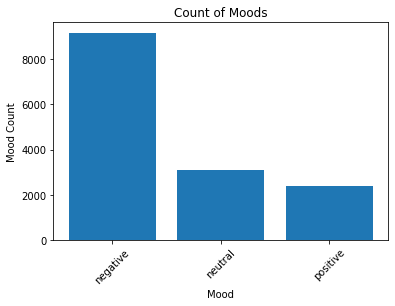

In [ ]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [ ]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

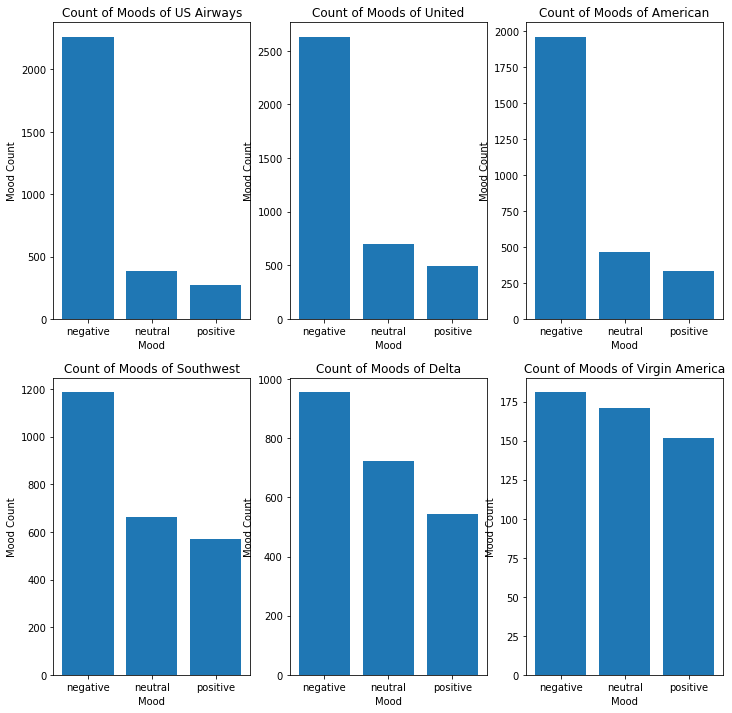

In [ ]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

In [ ]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))
print(NR_Count)

{'Late Flight': 1665, 'Customer Service Issue': 2910, 'Lost Luggage': 724, 'Cancelled Flight': 847, 'Bad Flight': 580, 'longlines': 178, "Can't Tell": 1190, 'Damaged Luggage': 74, 'Flight Booking Problems': 529, 'Flight Attendant Complaints': 481}


In [ ]:
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [ ]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    

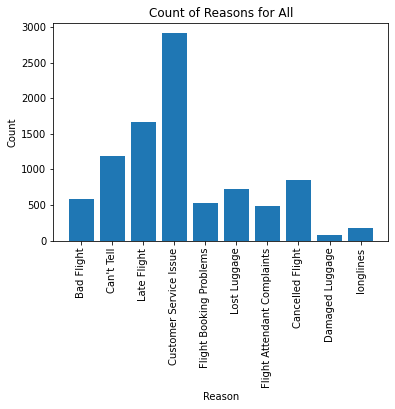

In [ ]:
plot_reason('All')

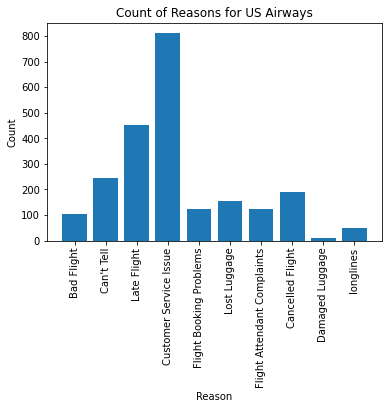

In [ ]:
plot_reason('US Airways')

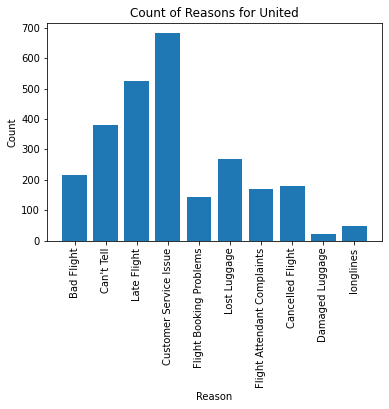

In [ ]:
plot_reason('United')

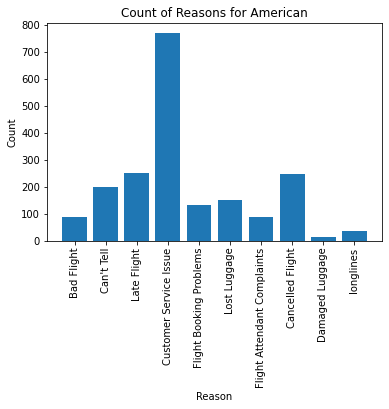

In [ ]:
plot_reason('American')


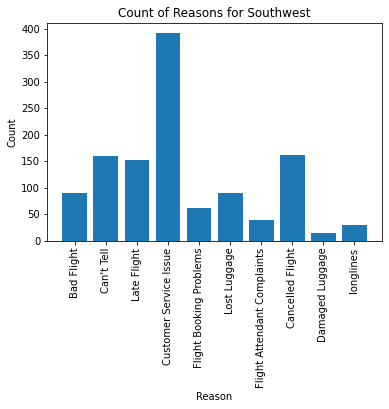

In [ ]:
plot_reason('Southwest')


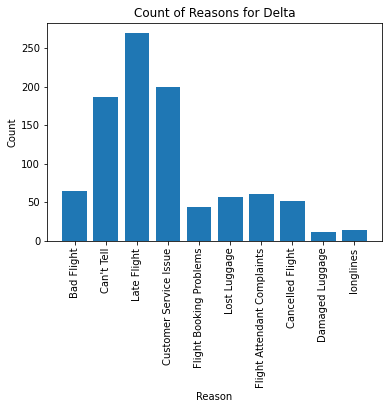

In [ ]:
plot_reason('Delta')


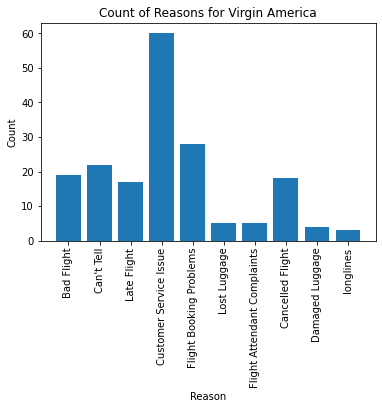

In [ ]:
plot_reason('Virgin America')

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

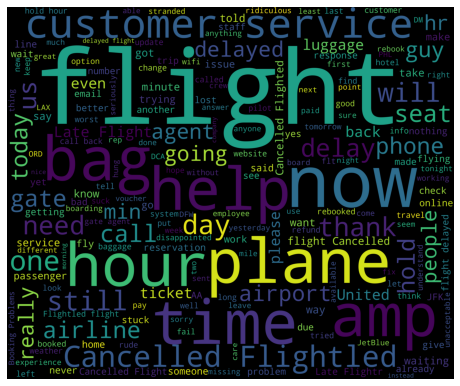

In [ ]:
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#select relavant columns
tweet_df = Tweet[['text','airline_sentiment']]
tweet_df.head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


**Omitimos los tweets clasificados como neutral**

In [ ]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
tweet_df.head(10)

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive
11,@VirginAmerica I &lt;3 pretty graphics. so muc...,positive
12,@VirginAmerica This is such a great deal! Alre...,positive
13,@VirginAmerica @virginmedia I'm flying your #f...,positive


In [ ]:
# convert airline_seentiment to numeric
sentiment_label = tweet_df.airline_sentiment.factorize() # convierte a factores numéricos
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

### **1. Usando un modelo lógistico**

[Enlace 1](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%203-%20Introducción%20al%20aprendizaje%20de%20máquinas/1.%20Introducción%20a%20IA/Cuadernos/am_Regresion_logistica_JAX.ipynb)

[Enlace 2](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%203-%20Introducción%20al%20aprendizaje%20de%20máquinas/1.%20Introducción%20a%20IA/Cuadernos/am_Regresion_Logistica_Tensorflow.ipynb)

[Enlace 3](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%203-%20Introducción%20al%20aprendizaje%20de%20máquinas/1.%20Introducción%20a%20IA/Cuadernos/am_regresion_Keras.ipynb)

[Enlace 4](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%203-%20Introducción%20al%20aprendizaje%20de%20máquinas/1.%20Introducción%20a%20IA/Cuadernos/am-logistico-keras-cancer.ipynb)

[Enlace 4](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%203-%20Introducción%20al%20aprendizaje%20de%20máquinas/1.%20Introducción%20a%20IA/Cuadernos/am-softmax-keras-iris.ipynb)

#### Importar los módulos requeridos

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(tf.__version__)

2.4.1


#### Divide los datos: entrenamiento y validación

In [ ]:
X_data = padded_sequence
Y_data = sentiment_label[0]

In [ ]:
X_train , x_test ,y_train, y_test = train_test_split(X_data , Y_data , test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from termcolor import colored as cl
yhat = model.predict(x_test)
yhat_prob = model.predict_proba(x_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob[:10])

yhat samples :  [1 1 1 1 1 1 1 1 1 1]
yhat_prob samples :  [[0.41252893 0.58747107]
 [0.33598899 0.66401101]
 [0.17410754 0.82589246]
 [0.03575526 0.96424474]
 [0.2828372  0.7171628 ]
 [0.33649628 0.66350372]
 [0.0580701  0.9419299 ]
 [0.23453176 0.76546824]
 [0.25618468 0.74381532]
 [0.24419631 0.75580369]]


In [ ]:
from sklearn.metrics import jaccard_similarity_score as jss
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat).round(2)), attrs = ['bold']))


Jaccard Similarity Score of our model is 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
from sklearn.metrics import classification_report 
print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       485
           1       0.79      1.00      0.88      1824

    accuracy                           0.79      2309
   macro avg       0.39      0.50      0.44      2309
weighted avg       0.62      0.79      0.70      2309



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ROC Curve**


Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

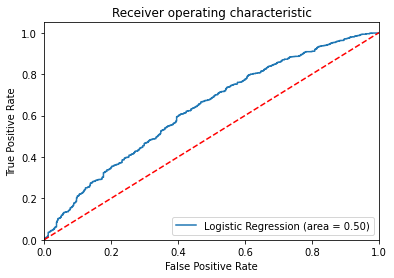

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
prueba = model.predict(tw)
prueba

array([1])

### **2. Usando Naive Bayes**


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train);
print(model2)

GaussianNB(priors=None, var_smoothing=1e-09)


In [ ]:
from termcolor import colored as cl
yhat2 = model2.predict(x_test)
yhat_prob2 = model2.predict_proba(x_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat2[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob2[:10])

yhat samples :  [0 0 0 0 0 0 0 0 0 0]
yhat_prob samples :  [[1.00000000e+00 1.13691209e-10]
 [1.00000000e+00 1.81929335e-10]
 [1.00000000e+00 3.42948895e-10]
 [9.98933221e-01 1.06677888e-03]
 [1.00000000e+00 8.71479755e-11]
 [1.00000000e+00 1.79492092e-10]
 [9.99999973e-01 2.65579334e-08]
 [1.00000000e+00 3.68296440e-10]
 [1.00000000e+00 2.07254967e-10]
 [1.00000000e+00 4.39948419e-11]]


In [ ]:
from sklearn.metrics import jaccard_similarity_score as jss
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat2).round(2)), attrs = ['bold']))

Jaccard Similarity Score of our model is 0.25


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
from sklearn.metrics import classification_report 
print(cl(classification_report(y_test, yhat2), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.21      0.96      0.35       485
           1       0.87      0.06      0.12      1824

    accuracy                           0.25      2309
   macro avg       0.54      0.51      0.23      2309
weighted avg       0.73      0.25      0.17      2309



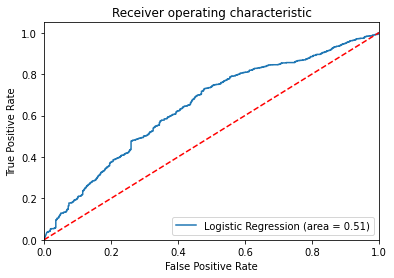

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model2.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Ahora vamos a generar algunos datos nuevos y predecir la etiqueta:

In [ ]:
ynew = model2.predict(tw)
ynew

array([0])

### **3. Usando SVM**

[Enlace 1](https://github.com/AprendizajeProfundo/Diplomado/blob/4a5fe7f38f6dad874f379df44f11c86caf53db74/Temas/Módulo%201-%20Matemáticas%20y%20Estadística/2.%20Estadísica%2C%20Teoría%20de%20la%20Decisión%20y%20Teoría%20de%20la%20información/Cuadernos/.ipynb_checkpoints/Tensor_Distribucion_Prob-checkpoint.ipynb)

[Enlace 2](https://github.com/AprendizajeProfundo/Diplomado/blob/4a5fe7f38f6dad874f379df44f11c86caf53db74/Temas/Módulo%201-%20Matemáticas%20y%20Estadística/2.%20Estadísica%2C%20Teoría%20de%20la%20Decisión%20y%20Teoría%20de%20la%20información/Cuadernos/Tensor_Distribucion_Prob.ipynb)

[Enlace 3](https://github.com/AprendizajeProfundo/Diplomado/blob/716e26b5784a9706afa866b140ddb68dcfb3b208/Temas/Módulo%2014-%20Aprendizaje%20no%20Supervisado/Cuadernos/ACS.ipynb)

In [ ]:
from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

In [ ]:
from termcolor import colored as cl
yhat2 = clf.predict(x_test)
yhat_prob3 = clf.predict_proba(x_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat3[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob3[:10])


In [ ]:
from sklearn.metrics import jaccard_similarity_score as jss
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat3).round(2)), attrs = ['bold']))

In [ ]:
from sklearn.metrics import classification_report 
print(cl(classification_report(y_test, yhat3), attrs = ['bold']))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
clf.predict(tw)

### **4. Usando una red neuronal**
**Preprocesamiento de textos** 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
vocab_size

13234

In [ ]:
print(tokenizer.word_index)

{'to': 1, 'the': 2, 'i': 3, 'a': 4, 'united': 5, 'you': 6, 'for': 7, 'flight': 8, 'and': 9, 'on': 10, 'my': 11, 'usairways': 12, 'americanair': 13, 'is': 14, 'in': 15, 'southwestair': 16, 'of': 17, 'jetblue': 18, 'me': 19, 'your': 20, 'it': 21, 'was': 22, 'not': 23, 'no': 24, 'have': 25, 'at': 26, 'with': 27, 'that': 28, 'this': 29, 'get': 30, 'but': 31, 'be': 32, 'cancelled': 33, 'thanks': 34, 'now': 35, 'service': 36, 'are': 37, 'we': 38, 'from': 39, 'an': 40, 'been': 41, 'just': 42, '2': 43, 'so': 44, 'customer': 45, 'help': 46, 't': 47, 'can': 48, 'time': 49, 'co': 50, 'up': 51, 'hours': 52, 'http': 53, 'do': 54, 'hold': 55, 'they': 56, 'out': 57, 'amp': 58, 'plane': 59, "i'm": 60, 'us': 61, 'all': 62, 'will': 63, 'why': 64, 'thank': 65, 'still': 66, 'our': 67, 'delayed': 68, 'what': 69, 'when': 70, 'how': 71, 'one': 72, "can't": 73, 'flights': 74, 'call': 75, 'gate': 76, 'hour': 77, 'had': 78, 'flightled': 79, 'back': 80, 'bag': 81, 'if': 82, 'would': 83, 'after': 84, 'has': 85, '

In [ ]:
print(tweet[0])
print(encoded_docs[0])

@VirginAmerica plus you've added commercials to the experience... tacky.
[103, 575, 530, 1287, 2416, 1, 2, 177]


In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  103  575  530 1287
 2416 

In [ ]:
print(vocab_size)

11253


**El Modelo keras**

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           423488    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
_________________________________________________________________
None


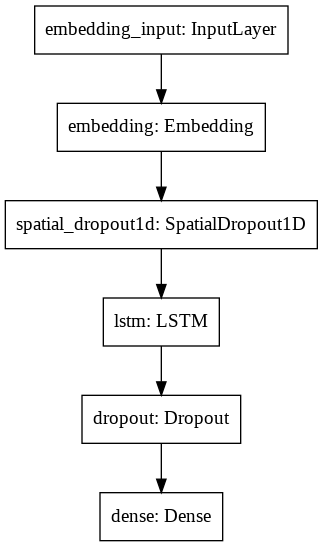

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/Minería indiv/Tarea sentimiento/model.png')

In [ ]:
sentiment_label[0]

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
padded_sequence

array([[   0,    0,    0, ...,    1,    2,  177],
       [   0,    0,    0, ...,   25,  482, 2417],
       [   0,    0,    0, ...,  483,   86,   21],
       ...,
       [   0,    0,    0, ...,    8,    1,  480],
       [   0,    0,    0, ..., 1682,   45,  945],
       [   0,    0,    0, ...,  144,   11, 2325]], dtype=int32)

In [ ]:
padded_sequence.shape

(11541, 200)

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 74s 244ms/step - loss: 0.4948 - accuracy: 0.7901 - val_loss: 0.2142 - val_accuracy: 0.9181
Epoch 2/5
289/289 [==============================] - 71s 245ms/step - loss: 0.2423 - accuracy: 0.9046 - val_loss: 0.1758 - val_accuracy: 0.9407
Epoch 3/5
289/289 [==============================] - 72s 248ms/step - loss: 0.1646 - accuracy: 0.9393 - val_loss: 0.1658 - val_accuracy: 0.9394
Epoch 4/5
289/289 [==============================] - 72s 250ms/step - loss: 0.1420 - accuracy: 0.9487 - val_loss: 0.1641 - val_accuracy: 0.9402
Epoch 5/5
289/289 [==============================] - 71s 246ms/step - loss: 0.1125 - accuracy: 0.9579 - val_loss: 0.2010 - val_accuracy: 0.9381


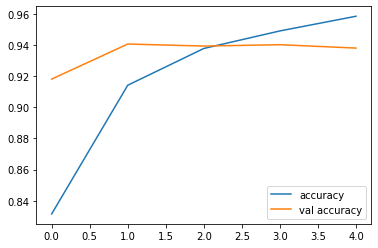

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

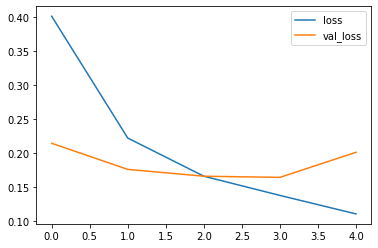

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
test_word = []
#a dissater.I never will will fligth wiht this airline again
test_word.append(" The service was a dissater.I never will will fligth wiht this airline again")
tw = tokenizer.texts_to_sequences(test_word)
tw = pad_sequences(tw,maxlen=200)
tw

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
prediction = model.predict(tw)
prediction

array([[0.8008721]], dtype=float32)

In [ ]:
from termcolor import colored as cl
yhat3 = model.predict(x_test)
yhat_prob3 = model.predict_proba(x_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat3[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob3[:10])

In [ ]:
from sklearn.metrics import jaccard_similarity_score as jss
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat3).round(2)), attrs = ['bold']))

In [ ]:
from sklearn.metrics import classification_report 
print(cl(classification_report(y_test, yhat3), attrs = ['bold']))

## **Sentiment140**

### Pre-procesamiento y analisis descriptivo

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

tf.__version__

'2.5.0'

In [35]:
import pandas as pd
import numpy as np

In [36]:
df2= pd.read_csv('/content/drive/MyDrive/Minería indiv/Tarea sentimiento/sentiment140 dataset..zip (Unzipped Files)/training.1600000.processed.noemoticon.csv', sep=',', encoding='latin-1', header=None, names=['Sentimiento','Id','Fecha','Query','Usuario','Tweet'])
df2.head()

,Sentimiento,Id,Fecha,Query,Usuario,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Analisis descriptivo**

In [37]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
Tweet2 = df2
(len(Tweet2)-Tweet2.count())/len(Tweet2)

Sentimiento    0.0
Id             0.0
Fecha          0.0
Query          0.0
Usuario        0.0
Tweet          0.0
dtype: float64

No posee valorese perdidos

In [39]:
Tweet2.count()

Sentimiento    1600000
Id             1600000
Fecha          1600000
Query          1600000
Usuario        1600000
Tweet          1600000
dtype: int64

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment

In [40]:
Mood_count2=Tweet2['Sentimiento'].value_counts()

print(Mood_count2)

4    800000
0    800000
Name: Sentimiento, dtype: int64


Text(0.5, 1.0, 'Count of Moods')

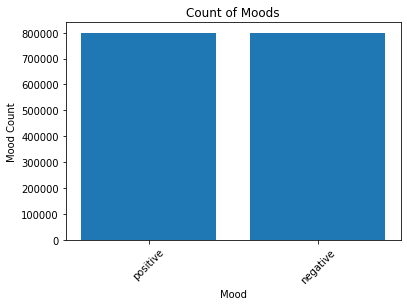

In [41]:
Index = [1,2]
plt.bar(Index,Mood_count2)
plt.xticks(Index,['positive','negative'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [42]:
(Tweet2['Usuario'].value_counts()).head(10)

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: Usuario, dtype: int64

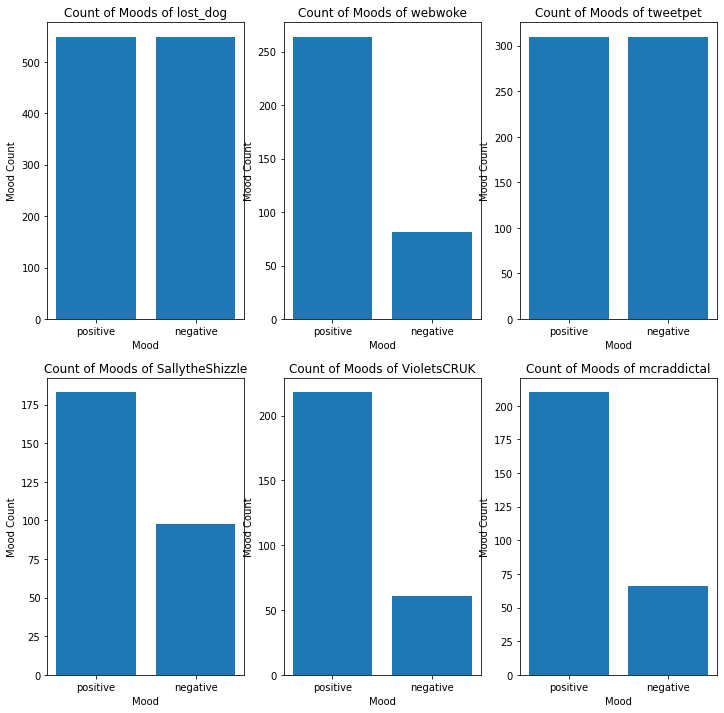

In [43]:
def plot_sub_sentiment(User):
    df=Tweet2[Tweet2['Usuario']==User]
    count=df['Sentimiento'].value_counts()
    Index = [1,2]
    plt.bar(Index,count)
    plt.xticks(Index,['positive','negative'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+User)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('lost_dog')
plt.subplot(232)
plot_sub_sentiment('webwoke')
plt.subplot(233)
plot_sub_sentiment('tweetpet')
plt.subplot(234)
plot_sub_sentiment('SallytheShizzle')
plt.subplot(235)
plot_sub_sentiment('VioletsCRUK')
plt.subplot(236)
plot_sub_sentiment('mcraddictal')


In [44]:
from wordcloud import WordCloud,STOPWORDS

In [45]:
df2=Tweet2[Tweet2['Sentimiento']==0]
words = ' '.join(df2['Tweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [46]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

**TWEETS NEGATIVOS**

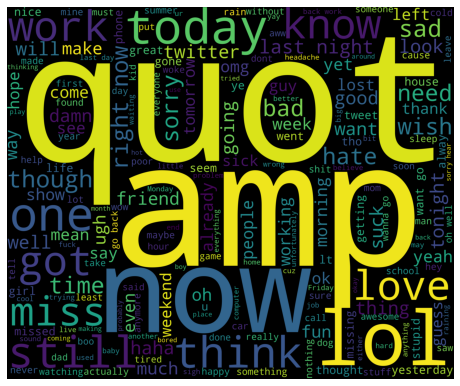

In [47]:
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [57]:
df3=Tweet2[Tweet2['Sentimiento']==4]
words = ' '.join(df3['Tweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [58]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

**TWEETS POSITIVOS**

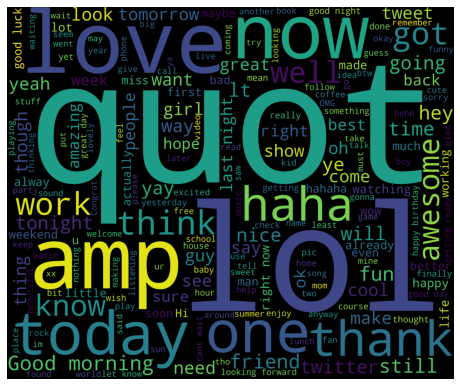

In [59]:
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
tweet_df2 = Tweet2[['Tweet','Sentimiento']]
tweet_df2.head(10)

,Tweet,Sentimiento
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
5,@Kwesidei not the whole crew,0
6,Need a hug,0
7,@LOLTrish hey long time no see! Yes.. Rains a...,0
8,@Tatiana_K nope they didn't have it,0
9,@twittera que me muera ?,0


In [49]:
print(tweet_df2['Sentimiento'].value_counts())

4    800000
0    800000
Name: Sentimiento, dtype: int64


In [50]:
tweet_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Tweet        1600000 non-null  object
 1   Sentimiento  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


No es necesario convertir sentimiento a numérico

In [51]:
sentiment_label=tweet_df2['Sentimiento']

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet2 = tweet_df2['Tweet']
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet2)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet2)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [53]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [54]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(tf.__version__)

2.5.0


**Divide los datos en entrenamiento y validación**

In [55]:
X_data = padded_sequence
Y_data = sentiment_label

In [56]:
X_train , x_test ,y_train, y_test = train_test_split(X_data , Y_data , test_size=0.2)

### Modelo lógistico

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [25]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
from termcolor import colored as cl
yhat = model.predict(x_test)
yhat_prob = model.predict_proba(x_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob[:10])

yhat samples :  [0 0 4 4 4 4 0 4 0 4]
yhat_prob samples :  [[0.50291592 0.49708408]
 [0.5715061  0.4284939 ]
 [0.49752691 0.50247309]
 [0.49156359 0.50843641]
 [0.46765849 0.53234151]
 [0.49285549 0.50714451]
 [0.53156441 0.46843559]
 [0.4947311  0.5052689 ]
 [0.52753104 0.47246896]
 [0.48527058 0.51472942]]


In [27]:
from sklearn.metrics import jaccard_similarity_score as jss
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat).round(2)), attrs = ['bold']))

Jaccard Similarity Score of our model is 0.52


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [28]:
from sklearn.metrics import classification_report 
print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.54      0.32      0.40    160177
           4       0.51      0.72      0.60    159823

    accuracy                           0.52    320000
   macro avg       0.53      0.52      0.50    320000
weighted avg       0.53      0.52      0.50    320000



### **2. Usando Naive Bayes**

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [31]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train);
print(model2)

GaussianNB(priors=None, var_smoothing=1e-09)


In [32]:
from termcolor import colored as cl
yhat2 = model2.predict(x_test)
yhat_prob2 = model2.predict_proba(x_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat2[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob2[:10])

yhat samples :  [0 0 0 0 0 0 0 0 0 0]
yhat_prob samples :  [[1.00000000e+00 6.50991982e-15]
 [1.00000000e+00 1.55009916e-19]
 [1.00000000e+00 7.16010290e-15]
 [1.00000000e+00 5.26691550e-16]
 [1.00000000e+00 1.66298810e-14]
 [1.00000000e+00 7.22135517e-15]
 [1.00000000e+00 6.40461081e-17]
 [1.00000000e+00 7.14132267e-15]
 [1.00000000e+00 1.70031427e-17]
 [1.00000000e+00 8.13699086e-15]]


In [33]:
from sklearn.metrics import jaccard_similarity_score as jss
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat2).round(2)), attrs = ['bold']))

Jaccard Similarity Score of our model is 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [34]:
from sklearn.metrics import classification_report 
print(cl(classification_report(y_test, yhat2), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    160177
           4       0.67      0.00      0.00    159823

    accuracy                           0.50    320000
   macro avg       0.58      0.50      0.33    320000
weighted avg       0.58      0.50      0.33    320000



### **3. Usando SVM**

In [ ]:
from sklearn import svm
clf = svm.SVC(probability=False)
clf.fit(X_train, y_train)

In [ ]:
from termcolor import colored as cl
yhat2 = clf.predict(x_test)
yhat_prob3 = clf.predict_proba(x_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat3[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob3[:10])

In [ ]:
from sklearn.metrics import jaccard_similarity_score as jss
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat3).round(2)), attrs = ['bold']))

In [ ]:
from sklearn.metrics import classification_report 
print(cl(classification_report(y_test, yhat3), attrs = ['bold']))

### Red neuronal

In [24]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           22110752  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 22,127,403
Trainable params: 22,127,403
Non-trainable params: 0
_________________________________________________________________
None


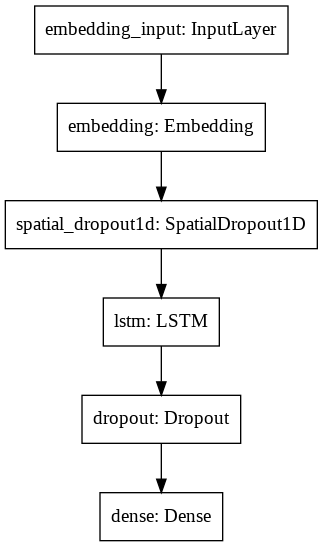

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/model.png')

In [ ]:
history = model.fit(padded_sequence,sentiment_label,validation_split=0.2, epochs=1, batch_size=32)

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
from termcolor import colored as cl
yhat3 = model.predict(x_test)
yhat_prob3 = model.predict_proba(x_test)

print(cl('yhat samples : ', attrs = ['bold']), yhat3[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob3[:10])

In [ ]:
from sklearn.metrics import jaccard_similarity_score as jss
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat3).round(2)), attrs = ['bold']))

In [ ]:
from sklearn.metrics import classification_report 
print(cl(classification_report(y_test, yhat3), attrs = ['bold']))